<a href="https://colab.research.google.com/github/buzzaggwd/NLP/blob/main/npl_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [100]:
PATH_TO_FILE: str = '/content/education-career-success_1.csv'
df = pd.read_csv(PATH_TO_FILE)

In [101]:
df

,Age,Job_Offers
0,24,5
1,21,4
2,28,0
3,25,1
4,22,4
...,...,...
4995,26,5
4996,18,5
4997,19,2
4998,19,5


In [102]:
def linear_regression(df: pd.DataFrame) -> list[float]:
  X = df.iloc[:, :-1].values
  y = df.iloc[:, -1].values
  X_b = np.c_[np.ones((len(X), 1)), X]
  theta = np.linalg.lstsq(X_b, y, rcond=None)[0]
  return theta.flatten().tolist()

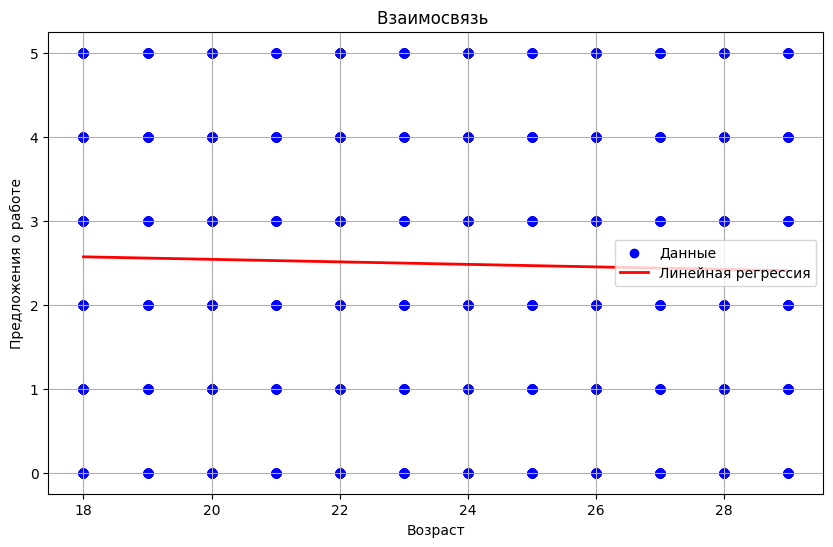

In [103]:
coefficients = linear_regression(df)
intercept, slope = coefficients

X_plot = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
y_pred = intercept + slope * X_plot

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Job_Offers'], color='blue', label='Данные')
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Линейная регрессия')
plt.xlabel('Возраст')
plt.ylabel('Предложения о работе')
plt.title('Взаимосвязь ')
plt.legend()
plt.grid(True)
plt.show()

In [104]:
def activation_func(x: list[float]) -> list[float]:
  return [1 / (1 + math.exp(-xi)) for xi in x]

![neuron](https://nickmccullum.com/images/python-deep-learning/understanding-neurons-deep-learning/activation-function.png)

In [105]:
def neuron(df: pd.DataFrame):
  coefficients = linear_regression(df)
  intercept = coefficients[0]
  feature_coeffs = coefficients[1:]
  linear_combination = []
  for index, row in df.iloc[:, :-1].iterrows():
      value = intercept
      for i, feature in enumerate(row):
          value += feature * feature_coeffs[i]
      linear_combination.append(value)
  result = activation_func(linear_combination)
  return result

print(neuron(df))

[0.9227600382735301, 0.9258998611418092, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789, 0.9227600382735301, 0.9194987398814248, 0.9269201100816803, 0.9227600382735301, 0.9183840059033842, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789, 0.9258998611418092, 0.9216866185255069, 0.9216866185255069, 0.9269201100816803, 0.9238199610325403, 0.9248665233083789, 0.9279274051590447, 0.9216866185255069, 0.917255224832923, 0.9238199610325403, 0.9279274051590447, 0.917255224832923, 0.9248665233083789, 0.9289218808622066, 0.917255224832923, 0.9194987398814248, 0.9238199610325403, 0.917255224832923, 0.9205995648453472, 0.9289218808622066, 0.9183840059033842, 0.9183840059033842, 0.9194987398814248, 0.917255224832923, 0.917255224832923, 0.9269201100816803, 0.917255224832923, 0.9227600382735301, 0.9258998611418092, 0.9205995648453472, 0.9269201100816803, 0.9248665233083789, 0.9269201100816803, 0.9227600382735301, 0.9248665233083789, 0.9205995648453472, 0.9227600382735301, 0.9279

In [106]:
X = df[['Age']].values
y = df[['Job_Offers']].values

X_normalized = (X - X.min()) / (X.max() - X.min())
y_normalized = (y - y.min()) / (y.max() - y.min())

![hidden](https://proproprogs.ru/htm/neural_network/files/struktura-i-princip-raboty-polnosvyaznyh-neyronnyh-setey.files/image001.png)

In [112]:
class Neuralnetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, learning_rate=0.01):
        np.random.seed(42)
        self.lr = learning_rate

        self.W1 = np.random.randn(input_size, hidden1_size) * 0.1
        self.b1 = np.zeros((1, hidden1_size))
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
        self.b2 = np.zeros((1, hidden2_size))
        self.W3 = np.random.randn(hidden2_size, output_size) * 0.1
        self.b3 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.array(activation_func(self.z1.flatten())).reshape(-1, self.W1.shape[1])
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = np.array(activation_func(self.z2.flatten())).reshape(-1, self.W2.shape[1])
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = np.array(activation_func(self.z3.flatten())).reshape(-1, self.W3.shape[1])
        return self.a3

    def backward(self, X, y):
        m = X.shape[0]

        dZ3 = self.a3 - y
        dW3 = np.dot(self.a2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m

        dZ2 = np.dot(dZ3, self.W3.T) * (self.a2 * (1 - self.a2))
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * (self.a1 * (1 - self.a1))
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 100 == 0:
                loss = np.mean((y - self.a3) ** 2)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')


input_size = 1
hidden1_size = 5
hidden2_size = 5
output_size = 1
learning_rate = 0.01
epochs = 1000

nn = Neuralnetwork(input_size, hidden1_size, hidden2_size, output_size, learning_rate)
predictions = nn.forward(X_normalized)

print("Исходный нейрон:", neuron(df)[:5])
print("Результаты прогнозирования:", predictions.flatten()[:5])

Исходный нейрон: [0.9227600382735301, 0.9258998611418092, 0.9183840059033842, 0.9216866185255069, 0.9248665233083789]
Результаты прогнозирования: [0.51259038 0.51258669 0.51259532 0.51259162 0.51258792]


In [109]:
def train_and_evaluate(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42)

    input_size = X_train.shape[1]
    hidden1_size = 5
    hidden2_size = 5
    output_size = 1
    learning_rate = 0.01
    epochs = 1000
    model = Neuralnetwork(input_size, hidden1_size, hidden2_size, output_size, learning_rate)

    model.train(X_train, Y_train, epochs)

    Y_train_pred = model.forward(X_train)
    Y_train_pred_binary = (Y_train_pred > 0.5).astype(int)
    Y_train_binary = (Y_train > 0.5).astype(int)
    train_accuracy = accuracy_score(Y_train_binary, Y_train_pred_binary)

    Y_test_pred = model.forward(X_test)
    Y_test_pred_binary = (Y_test_pred > 0.5).astype(int)
    Y_test_binary = (Y_test > 0.5).astype(int)
    test_accuracy = accuracy_score(Y_test_binary, Y_test_pred_binary)

    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test_binary, Y_test_pred_binary))

    return model


model = train_and_evaluate(X_normalized, y_normalized)

Epoch 0, Loss: 0.1169
Epoch 100, Loss: 0.1167
Epoch 200, Loss: 0.1167
Epoch 300, Loss: 0.1166
Epoch 400, Loss: 0.1166
Epoch 500, Loss: 0.1166
Epoch 600, Loss: 0.1166
Epoch 700, Loss: 0.1166
Epoch 800, Loss: 0.1166
Epoch 900, Loss: 0.1166
Точность на обучающей выборке: 0.5080
Точность на тестовой выборке: 0.4950

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       495
           1       0.00      0.00      0.00       505

    accuracy                           0.49      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.49      0.33      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


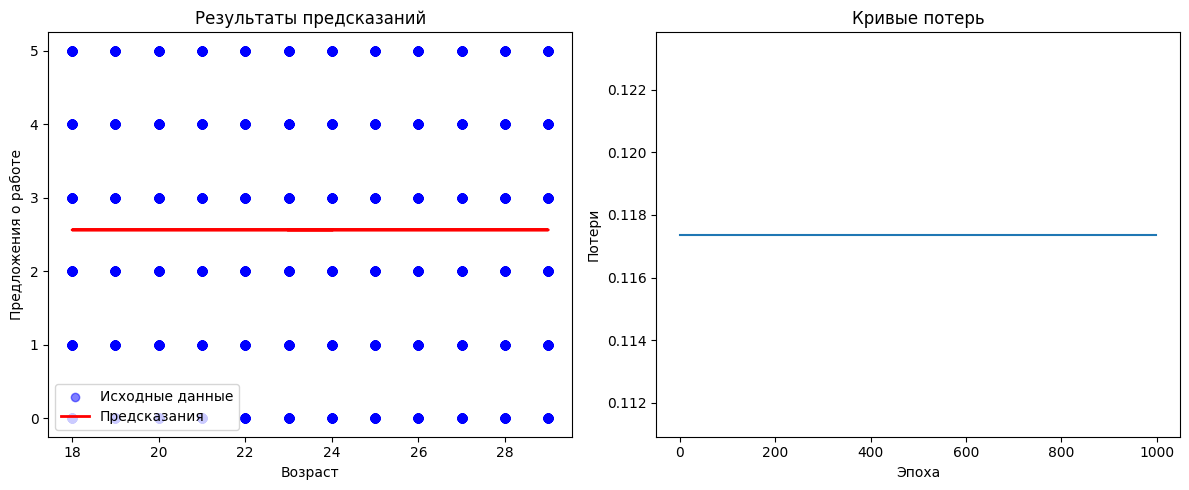

In [113]:
y_pred = predictions * (y.max() - y.min()) + y.min()
y_normalized = y_normalized * (y.max() - y.min()) + y.min()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Исходные данные')
plt.plot(X, y_pred, color='red', linewidth=2, label='Предсказания')
plt.xlabel('Возраст')
plt.ylabel('Предложения о работе')
plt.title('Результаты предсказаний')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title('Кривые потерь')
plt.xlabel('Эпоха')
plt.ylabel('Потери')

plt.tight_layout()
plt.show()